In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

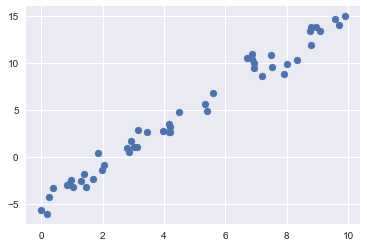

In [9]:
 rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

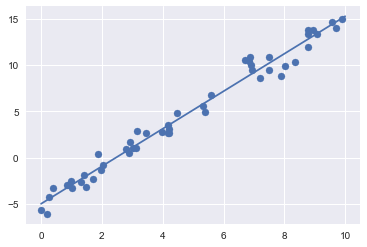

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [11]:
model.coef_

array([2.02720881])

In [12]:
model.intercept_

-4.998577085553202

In [13]:
# 现在我们 LineRegression 拟合一个多维的线性回归问题
# y = a0 + a1x1 + a2x2 + ......

In [14]:
rng = np.random.RandomState(1)

In [15]:
X = 10 * rng.rand(100,3)

In [16]:
y = 0.5 + np.dot(X,[1.5,-2,1])

In [17]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
model.coef_

array([ 1.5, -2. ,  1. ])

In [19]:
model.intercept_

0.5000000000000144

In [20]:
#上述多维回归问题，他将变量直接按的关系局限在了线性关系上面， 对于其他的比如多项式的回归的就不能处理
#上述问题的我们现在来学习基函数回归

In [26]:
#高斯基函数 ， 除了多项式基函数（PolyNomial）还有高斯基函数

In [31]:
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [32]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
LinearRegression())

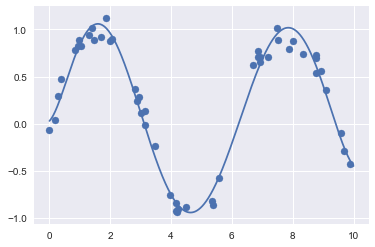

In [33]:
 rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [34]:
# 高斯基函数
class GaussianFeatures():
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    
    def fit(self, X, y=None):
        # 在数据区间中创建N个高斯分布中心
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,self.width_, axis=1)

In [35]:
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())

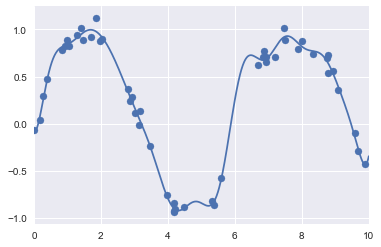

In [36]:
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

In [40]:
#正则化， regularization， 针对较大的模型参数进行惩罚，目的是为了降低过拟合的现象

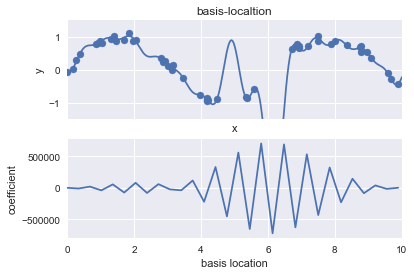

In [45]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
        ax[1].plot(model.steps[0][1].centers_,
        model.steps[1][1].coef_)
        ax[1].set(xlabel='basis location',
        ylabel='coefficient',
        xlim=(0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model,'basis-localtion')

In [38]:
from sklearn.linear_model import Ridge

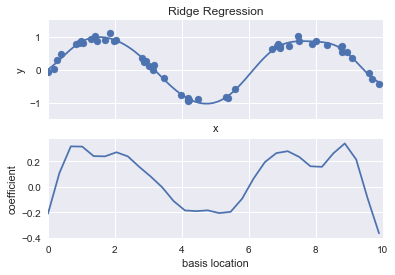

In [44]:
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')